Some weights of ElectraForMaskedLM were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['generator_lm_head.bias', 'generator_predictions.LayerNorm.bias', 'generator_predictions.LayerNorm.weight', 'generator_predictions.dense.bias', 'generator_predictions.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/var/folders/f9/y1rs5_mx629gk54rkh30npn80000gn/T/ipykernel_36700/3739903225.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(human_perplexities, label="Human Texts", kde=True, color="#aadfff")
/opt/anacon

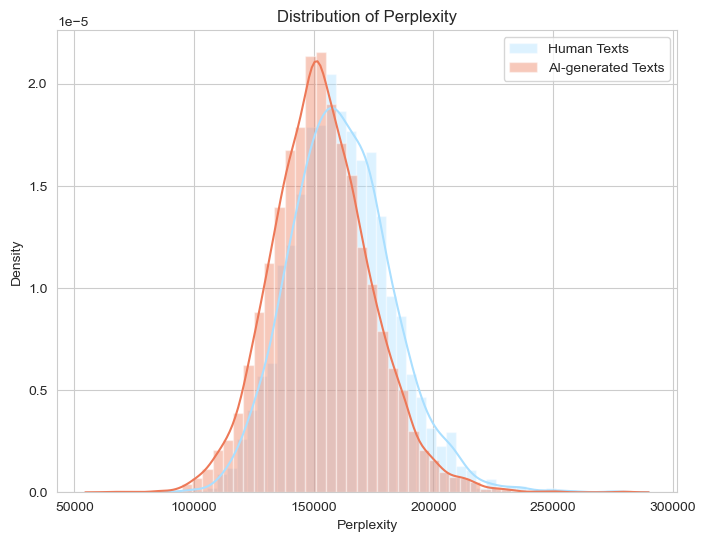

In [5]:
import torch
from transformers import ElectraTokenizer, ElectraForMaskedLM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "google/electra-base-discriminator"
tokenizer = ElectraTokenizer.from_pretrained(model_name)
model = ElectraForMaskedLM.from_pretrained(model_name)

def calculate_perplexity(text):
    max_length = model.config.max_position_embeddings
    input_ids = tokenizer.encode(text, return_tensors="pt", max_length=max_length, truncation=True)
    with torch.no_grad():
        output = model(input_ids)
        logits = output.logits
        loss_fct = torch.nn.CrossEntropyLoss()
        perplexity = torch.exp(loss_fct(logits.view(-1, logits.size(-1)), input_ids.view(-1)))
    return perplexity.item()

data = pd.read_csv('all_data.csv')
human_texts = data[data.labels == 0]['text'].values
ai_texts = data[data.labels == 1]['text'].values

human_perplexities = [calculate_perplexity(text) for text in human_texts]
ai_perplexities = [calculate_perplexity(text) for text in ai_texts]


sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.distplot(human_perplexities, label="Human Texts", kde=True, color="#aadfff")
sns.distplot(ai_perplexities, label="AI-generated Texts", kde=True, color="#ed7857")
plt.title("Distribution of Perplexity")
plt.xlabel("Perplexity")
plt.ylabel("Density")
plt.legend()
plt.show()

/var/folders/f9/y1rs5_mx629gk54rkh30npn80000gn/T/ipykernel_36700/2729397786.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(human_perplexities, label="Human Texts", kde=True, color="#aadfff")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/f9/y1rs5_mx629gk54rkh30npn80000gn/T/ipykernel_36700/2729397786.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ad

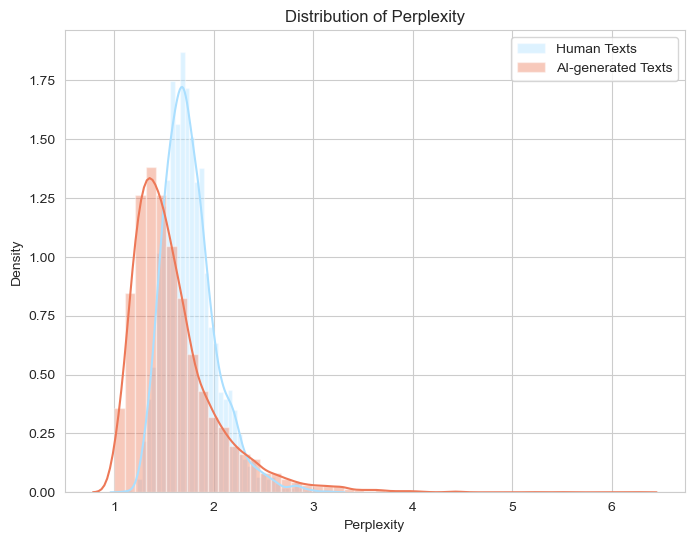

In [7]:
import torch
from transformers import RobertaTokenizer, RobertaForMaskedLM
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForMaskedLM.from_pretrained(model_name)

def calculate_perplexity(text):
    max_length = tokenizer.model_max_length
    input_ids = tokenizer.encode(text, return_tensors="pt", max_length=max_length, truncation=True)
    with torch.no_grad():
        output = model(input_ids)
        logits = output.logits
        loss_fct = torch.nn.CrossEntropyLoss()
        perplexity = torch.exp(loss_fct(logits.view(-1, logits.size(-1)), input_ids.view(-1)))
    return perplexity.item()

data = pd.read_csv('all_data.csv')
human_texts = data[data.labels == 0]['text'].values
ai_texts = data[data.labels == 1]['text'].values

human_perplexities = [calculate_perplexity(text) for text in human_texts]
ai_perplexities = [calculate_perplexity(text) for text in ai_texts]


sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.distplot(human_perplexities, label="Human Texts", kde=True, color="#aadfff")
sns.distplot(ai_perplexities, label="AI-generated Texts", kde=True, color="#ed7857")
plt.title("Distribution of Perplexity")
plt.xlabel("Perplexity")
plt.ylabel("Density")
plt.legend()
plt.show()